In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter


In [2]:
#df = pd.read_csv('../experimental-results/results_mocked.csv', sep=',',header=0)

In [3]:
#df

In [4]:
def measure_difference(filename_non_poisoned: str, filename_poisoned: str):
    df_non_poisoned = pd.read_csv('../experimental-results/' + filename_non_poisoned, sep=',',header=0)
    df_poisoned = pd.read_csv('../experimental-results/' + filename_poisoned, sep=',',header=0)
    
    datasets = ['books_200M_uint64', 'fb_200M_uint64', 'osm_cellids_200M_uint64', 'wiki_ts_200M_uint64']
    indexes = ['ALEX', 'BTree', 'DynamicPGM']
    
    performance_impact = {}
    for index_name in indexes:
        performance_impact[index_name] = []
        
    for dataset_name in datasets:
        for index_name in indexes:
            
            
            throughput_non_poisoned = df_non_poisoned[(df_non_poisoned["dataset_name"] == dataset_name) & (df_non_poisoned["index_name"]==index_name)]['throughput_in_s'].mean()
            throughput_poisoned = df_poisoned[(df_poisoned["dataset_name"] == dataset_name) & (df_poisoned["index_name"]==index_name)]['throughput_in_s'].mean()
            
            # decrease should be positive, thus indicating a performance degredation
            if throughput_poisoned == 0:
                decrease_in_percent = 0.0
            else:
                decrease = throughput_non_poisoned - throughput_poisoned
                decrease_in_percent = decrease / throughput_non_poisoned
                  
            performance_impact[index_name].append(decrease_in_percent)
            
    N = 4
    ind = np.arange(N) 
    width = 0.17

    #fig, ax = plt.subplots()
    bar1 = plt.bar(ind, performance_impact['ALEX'], width, color = 'green')
    bar2 = plt.bar(ind+width, performance_impact['BTree'], width, color = 'orange')
    bar3 = plt.bar(ind+width*2, performance_impact['DynamicPGM'], width, color = 'blue')

    plt.xlabel("Dataset")
    plt.ylabel('Performance impact in %')

    plt.xticks(ind+width,['books', 'fb', 'osmc', 'wiki'])


    # Put a legend above plot
    plt.legend((bar1, bar2, bar3), ('ALEX', 'B-Tree', 'Dynamic-PGM'), bbox_to_anchor=(0,1.02,1,0.2), loc='upper center', ncol=4)
    plt.show()
            
    return performance_impact

In [5]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1f' % (x * 1e-6)


formatter = FuncFormatter(millions)

def plot_chart_for_workload(filename : str):
    df = pd.read_csv('../experimental-results/' + filename, sep=',',header=0)

    datasets = ['books_200M_uint64', 'fb_200M_uint64', 'osm_cellids_200M_uint64', 'wiki_ts_200M_uint64']

    best_results_alex = []
    best_results_btree = []
    best_results_dpgm = []
    for dataset_name in datasets:
        # Note: To make results more robust, switch from max() to mean()
        best_results_alex.append(df[(df["dataset_name"] == dataset_name) & (df["index_name"]=='ALEX')]['throughput_in_s'].mean())
        best_results_btree.append(df[(df["dataset_name"] == dataset_name) & (df["index_name"]=='BTree')]['throughput_in_s'].mean())
        best_results_dpgm.append(df[(df["dataset_name"] == dataset_name) & (df["index_name"]=='DynamicPGM')]['throughput_in_s'].mean())

    N = 4
    ind = np.arange(N) 
    width = 0.17

    fig, ax = plt.subplots()
    bar1 = plt.bar(ind, best_results_alex, width, color = 'green')
    bar2 = plt.bar(ind+width, best_results_btree, width, color = 'orange')
    bar3 = plt.bar(ind+width*2, best_results_dpgm, width, color = 'blue')
    
    plt.xlabel("Dataset")
    plt.ylabel('Throughput (million ops / sec)')

    plt.xticks(ind+width,['books', 'fb', 'osmc', 'wiki'])

    ax.yaxis.set_major_formatter(formatter)
    # Put a legend above plot
    plt.legend((bar1, bar2, bar3), ('ALEX', 'B-Tree', 'Dynamic-PGM'), bbox_to_anchor=(0,1.02,1,0.2), loc='upper center', ncol=4)
    plt.show()

## Non-poisoned

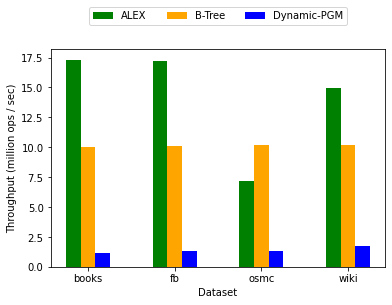

In [6]:
plot_chart_for_workload('non_poisoned_read_only.csv')

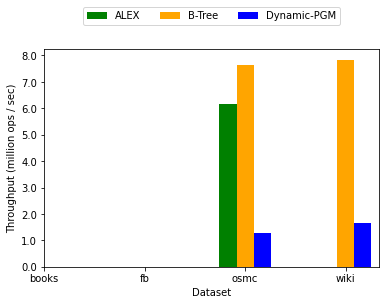

In [7]:
plot_chart_for_workload('non_poisoned_read_heavy.csv')

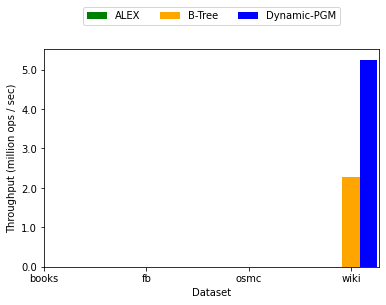

In [18]:
plot_chart_for_workload('non_poisoned_write_heavy.csv')

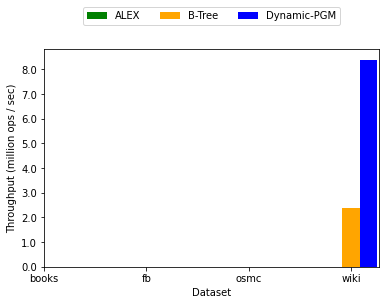

In [33]:
plot_chart_for_workload('non_poisoned_write_only.csv')

## Poisoned

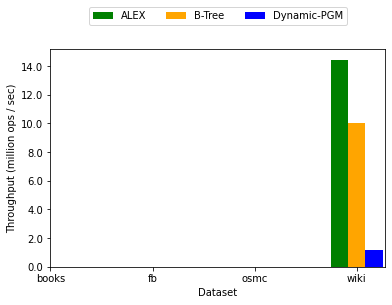

In [37]:
plot_chart_for_workload('poisoned_read_only.csv')

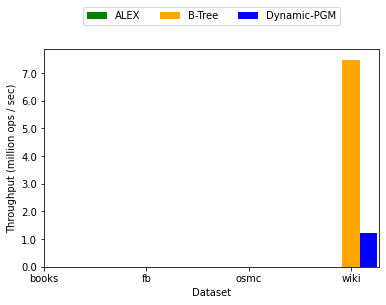

In [40]:
plot_chart_for_workload('poisoned_read_heavy.csv')

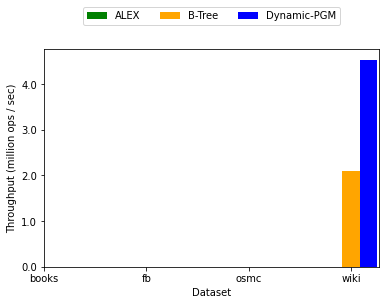

In [21]:
plot_chart_for_workload('poisoned_write_heavy.csv')

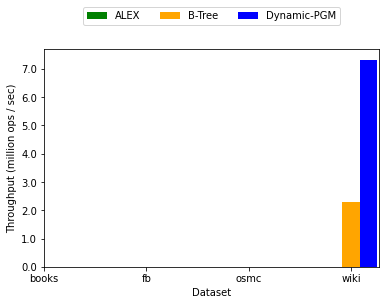

In [16]:
plot_chart_for_workload('poisoned_write_only.csv')

## Calculate performance deterioration

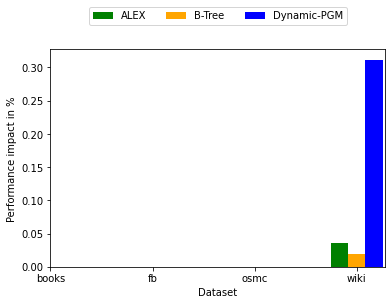

{'ALEX': [nan, nan, nan, 0.035748768836905906], 'BTree': [nan, nan, nan, 0.018782953130327858], 'DynamicPGM': [nan, nan, nan, 0.3116490500928561]}


In [38]:
diff = measure_difference('non_poisoned_read_only.csv', 'poisoned_read_only.csv')
print(diff)

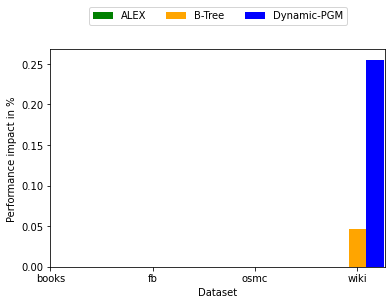

{'ALEX': [nan, nan, nan, nan], 'BTree': [nan, nan, nan, 0.04648743537859824], 'DynamicPGM': [nan, nan, nan, 0.25513212153121184]}


In [39]:
diff = measure_difference('non_poisoned_read_heavy.csv', 'poisoned_read_heavy.csv')
print(diff)

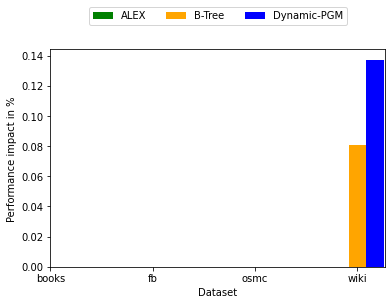

{'ALEX': [nan, nan, nan, nan], 'BTree': [nan, nan, nan, 0.08101036374989125], 'DynamicPGM': [nan, nan, nan, 0.13726876946966304]}


In [22]:
diff = measure_difference('non_poisoned_write_heavy.csv', 'poisoned_write_heavy.csv')
print(diff)

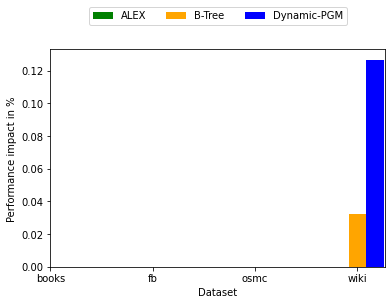

{'ALEX': [nan, nan, nan, nan], 'BTree': [nan, nan, nan, 0.03235267885313732], 'DynamicPGM': [nan, nan, nan, 0.12673641077220904]}


In [32]:
diff = measure_difference('non_poisoned_write_only.csv', 'poisoned_write_only.csv')
print(diff)